<a href="https://colab.research.google.com/github/yuciferr/Multiclass_Classification/blob/main/Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [77]:
n_pts = 500
centers = [[-1, 1], [0, 0], [1, 1]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state = 123, centers=centers, cluster_std=0.4)


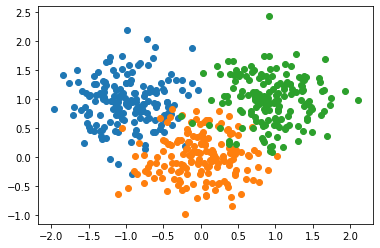

In [78]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])


In [79]:
print(y)
y_cat = to_categorical(y, 3)
print(y_cat)

[2 2 2 0 1 0 0 2 2 2 1 1 0 0 1 2 2 2 2 0 2 0 1 2 1 2 0 0 2 1 1 0 0 2 1 0 2
 0 2 0 0 2 1 0 2 0 1 2 0 2 0 1 1 0 1 2 2 0 1 2 0 2 0 2 1 0 1 1 1 1 2 1 1 1
 1 1 2 1 1 2 0 1 2 2 1 0 2 1 1 2 0 0 2 1 2 2 0 1 2 0 2 1 1 2 2 0 0 1 2 1 1
 2 0 0 1 0 2 2 2 2 1 2 1 2 0 2 2 0 1 0 0 0 0 2 0 1 0 2 2 0 2 2 2 2 1 2 0 0
 0 2 1 0 2 0 0 1 1 0 2 0 0 1 1 2 2 0 2 1 2 2 2 1 1 1 2 0 0 1 0 1 2 2 1 1 2
 1 1 0 0 2 2 1 0 0 0 0 2 2 0 2 1 1 2 0 0 2 2 0 1 0 2 0 2 2 0 0 2 1 2 0 2 0
 1 1 2 0 0 0 2 1 2 2 2 0 0 1 0 2 0 2 0 2 1 1 1 2 2 1 1 1 0 1 2 1 0 1 2 2 0
 0 0 1 1 1 2 1 1 2 1 1 2 0 0 0 2 0 2 0 0 0 2 1 1 0 2 1 0 0 1 1 1 1 2 1 1 0
 0 0 2 1 1 1 0 0 0 0 0 0 0 1 2 1 2 1 0 2 0 0 1 2 0 1 2 2 2 2 2 0 1 2 0 2 1
 0 0 1 2 0 2 0 1 1 0 2 1 0 1 1 1 0 2 0 2 0 1 1 0 1 1 1 2 2 0 2 0 2 2 1 1 0
 2 2 2 1 1 1 2 2 0 1 2 1 2 0 1 2 2 2 0 1 1 1 2 0 2 0 0 2 1 1 1 2 0 1 0 0 1
 1 2 0 0 1 2 1 1 0 2 0 1 0 2 0 0 0 1 1 1 2 0 1 1 0 2 1 2 1 1 1 1 0 0 0 0 0
 2 2 1 1 0 1 0 2 2 2 2 0 0 1 1 0 0 1 1 1 2 2 1 1 1 1 0 0 2 0 1 0 1 0 1 1 2
 2 0 2 2 1 0 1 2 0 2 0 2 

In [80]:
model = Sequential()
model.add(Dense(3, input_shape=(2,), activation='softmax'))
model.compile(Adam(lr=0.1), 'categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [81]:
history = model.fit(X, y_cat, verbose=1, batch_size = 50, epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.7140
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.9240
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2264 - accuracy: 0.9440
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1921 - accuracy: 0.9500
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1769 - accuracy: 0.9500
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1681 - accuracy: 0.9480
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.9500
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9520
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1545 - accuracy: 0.9500
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1525 - accuracy: 0.9500
Epoch 11/

In [57]:
def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = np.argmax(model.predict(grid), axis=1)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)


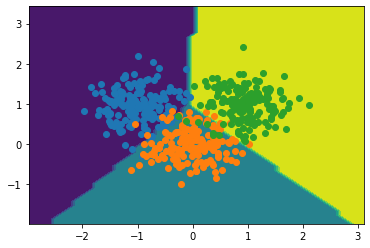

In [82]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

Prediction is:  [1]


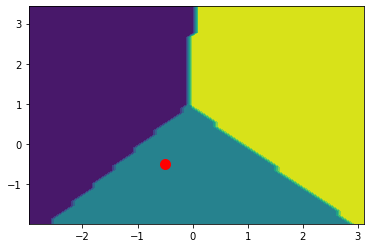

In [86]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
x = -0.5
y = -0.5
 
point = np.array([[x, y]])
prediction = np.argmax(model.predict(point), axis=1)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", prediction)